# Image Classification Using Logistic Regression

dataset consits 0f 60000 records where each row forms an image

28*28 pixels images

each column represents a intensity of a pixel - Greyscale images

Even very simple models classify images easily due to the simplicity of mnist dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('./datasets/fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

No of categories in data

In [5]:
np.sort(fashion_mnist_df['label'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [6]:
type(fashion_mnist_df['label'])

pandas.core.series.Series

training using all these images will require several hours so lets make use of  a sample

In [7]:
fashion_mnist_df_2 = fashion_mnist_df.sample(frac = 0.3).reset_index(drop=True)

In [8]:
fashion_mnist_df_2.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0,0,0,0,0,0,0,0,0,...,182,188,193,211,114,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,50,44,7,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,1,0,0,82,122,113,14,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,104,139,171,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,173,172,64,0,0,0


In [9]:
fashion_mnist_df_2.shape

(18000, 785)

Its easy to work with numbers while using ML algorithms. But for us to understand
, lets make a lookup dict to map the labels to actual fashion accessory.

In [10]:
LOOKUP = {
    0 : 'T-Shirt',
    1 : 'Trouser', 
    2 : 'Pullover', 
    3 : 'Dress', 
    4 : 'Coat', 
    5 : 'Sandal', 
    6 : 'Shirt', 
    7 : 'Sneaker', 
    8 : 'Bag', 
    9 : 'Ankle Boot'
}

In [11]:
# To display an image :

def display_image(features,actual_label):
    print('Actual label : ',LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))
    

In [12]:
fashion_mnist_df_2.iloc[0,0]

8

In [13]:
X = fashion_mnist_df_2[fashion_mnist_df_2.columns[1:]]

In [14]:
Y = fashion_mnist_df_2['label']

In [15]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,182,188,193,211,114,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,50,44,7,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,82,122,113,14,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,104,139,171,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,173,172,64,0,0,0


In [16]:
X.loc[5].values[:100] # first 100 values of pixels of image @ index 5

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 177, 145,
       151, 123, 148, 184,  93,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 229, 198, 163,
       229, 208, 207, 203, 226, 223, 159, 243, 203, 149,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 138, 228,
       148, 136, 185, 255, 223, 214, 254, 204, 156, 170, 220, 194,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
       147, 219, 203, 138, 131, 202, 230, 217, 204], dtype=int64)

In [17]:
Y.loc[5] # label of image

4

Actual label :  Coat


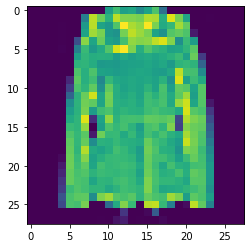

In [18]:
display_image(X.loc[5].values,Y.loc[5])

This is an image in greyscale. Matplotlib uses a different colorscale and is the reason why we have a color image

Actual label :  Sandal


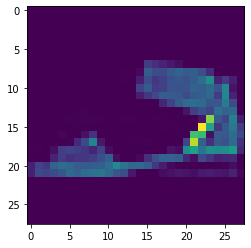

In [19]:
display_image(X.loc[567].values,Y.loc[567])

Actual label :  T-Shirt


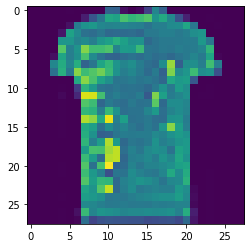

In [20]:
display_image(X.loc[100].values,Y.loc[100])

Observe that all of these images are 28 pixels by 28 pixels. Now before we feed in this image data into our logistic regression model, let's scale our numeric features so that we have all intensity values specified between 0 and 1. The intensity values in the original dataset are integers between 0 and 255. I'm going to divide all of the pixel values by 255 so that each pixel now is a number between 0 and 1. And here is what our resulting X features look like. You can see that all of these numbers are now values between 0 and 1.

In [21]:
X = X/255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.713725,0.737255,0.756863,0.827451,0.447059,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.196078,0.172549,0.027451,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.003922,0.000000,0.000000,0.321569,0.478431,0.443137,0.054902,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.407843,0.545098,0.670588,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,...,0.000000,0.000000,0.000000,0.000000,0.678431,0.674510,0.250980,0.0,0.0,0.0


Now that we have our image data set up the way we want it to be, you'll find that it's no different performing classification on images versus other kinds of data using logistic regression. Now, logistic regression works here only because we are working with fairly simple images from the fashion MNIST dataset. If you want to work with more complex color images, you'll have to use something like neural networks. 

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

X_train.shape,Y_train.shape

((14400, 784), (14400,))

Let's now use sklearn's train_test_split to split up our data into training data and test data. Eighty percent of the 18, 0000 images will be used to train our model. That's about 14, 400 images. And the rest of the images, all 3600 of them, will be part of our test data, which we'll use to evaluate our model. 

In [23]:
X_test.shape,Y_test.shape

((3600, 784), (3600,))

In [24]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    
    prec = precision_score(y_test,y_pred,average='weighted')
    recall = recall_score(y_test,y_pred,average='weighted')
    
    print('Test data count:',len(y_test))
    print('Accuracy_count :',num_acc)
    print('Accuracy_score :',acc)
    print('Precision_score:',prec)
    print('Recall_score   :',recall)

Once again, we define a summarized classification helper function that will print out the accuracy, precision, and recall scores for our model. 


Calculating the accuracy score of our model and the number of correctly predicted labels is exactly the same.


What is different here is how we calculate the precision and recall scores. So far, we've only worked with binary classifiers. Because we are performing multi-class classification, the images can be categorized into 10 different classes. 


We need to specify how we average the precision and recall scores. The average parameter here tells a score calculator that for multi-class classification, return a weighted average score of precision and recall for each label. 

If average is equal to none, you'll get a precision and recall score for each label separately. The weights that will be used to average out the precision and recall scores for each label depends on the number of true instances of each label in our dataset. 


In [27]:
logistic_model = LogisticRegression(solver = "sag", multi_class = 'auto',max_iter=10000).fit(X_train,Y_train)

The remaining steps to build and train our model are straightforward. Instantiate a logistic regression estimator. The one difference here is that we use solver='sag' rather than liblinear. 


This is one of the preferred optimization algorithm to use with logistic regression when you're working with multi-class classification. This algorithm is able to handle multinomial loss for multi-class classifications. It converges faster for very large datasets as well. The liblinear solver that we used for binary classification does not handle multinomial loss, it performs multi-class classification using the one-versus-rest scheme. For every pair of labels or categories, it'll perform a binary classification to see which label is more likely. 


The liblinear solver is preferred for binary classification on smaller datasets. When you specify multi_class='auto' here, you're leaving it up to the logistic regression estimator to select the right kind of problem to fit based on whether we perform binary classification or multi-class classification. We'll train this model for 10, 000 iterations. Call fit to begin the training process. 


You'll find that this training takes a little longer to run than what you're used to. It might take up to 15 minutes. Once you have a fully trained model, you can use it for prediction on your test data. Simply pass in x_test and call logistic_model.predict. Here is a sample of some of the predicted values from our model. You can see that these are integers from 0 to 9. Remember that every integer represents a fashion accessory. 

In [28]:
y_pred = logistic_model.predict(X_test)

y_pred

array([0, 6, 3, ..., 1, 8, 6], dtype=int64)



Let's call the summarize_classification function to see how our logistic regression model performed. And you can see that it did fairly well. The accuracy score of 83% is quite high, considering that we had 10 categories into which images can be classified. It got 83% of its predictions correct. We've now seen how we can use our logistic regression estimator to classify images into multiple classes

In [29]:
summarize_classification(Y_test,y_pred)

Test data count: 3600
Accuracy_count : 3003
Accuracy_score : 0.8341666666666666
Precision_score: 0.8320361696279857
Recall_score   : 0.8341666666666666


The accuracy score of 83% is quite high, considering that we had 10 categories into which images can be classified. It got 83% of its predictions correct. We've now seen how we can use our logistic regression estimator to classify images into multiple classes.